<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data2=np.genfromtxt('/home/mnasser/Downloads/california_housing_train.csv',delimiter=',',skip_header=1)

In [5]:
print(data2)

[[-1.1431e+02  3.4190e+01  1.5000e+01 ...  4.7200e+02  1.4936e+00
   6.6900e+04]
 [-1.1447e+02  3.4400e+01  1.9000e+01 ...  4.6300e+02  1.8200e+00
   8.0100e+04]
 [-1.1456e+02  3.3690e+01  1.7000e+01 ...  1.1700e+02  1.6509e+00
   8.5700e+04]
 ...
 [-1.2430e+02  4.1840e+01  1.7000e+01 ...  4.5600e+02  3.0313e+00
   1.0360e+05]
 [-1.2430e+02  4.1800e+01  1.9000e+01 ...  4.7800e+02  1.9797e+00
   8.5800e+04]
 [-1.2435e+02  4.0540e+01  5.2000e+01 ...  2.7000e+02  3.0147e+00
   9.4600e+04]]


In [6]:
x_features=np.array(data2[:,0:8])
y=np.array(data2[:,8]).reshape(len(data2),1)
print('Features : \n',x_features)
print('Output : \n',y)

Features : 
 [[-114.31     34.19     15.     ... 1015.      472.        1.4936]
 [-114.47     34.4      19.     ... 1129.      463.        1.82  ]
 [-114.56     33.69     17.     ...  333.      117.        1.6509]
 ...
 [-124.3      41.84     17.     ... 1244.      456.        3.0313]
 [-124.3      41.8      19.     ... 1298.      478.        1.9797]
 [-124.35     40.54     52.     ...  806.      270.        3.0147]]
Output : 
 [[ 66900.]
 [ 80100.]
 [ 85700.]
 ...
 [103600.]
 [ 85800.]
 [ 94600.]]


In [7]:
#Normalizing data

    #normalizing x data(independent features)
x_means=x_features.mean(axis=0) #getting mean for every column(feature)
mat_xmeans=np.outer(np.ones(len(y)),x_means) #extend the array of means to be matrix
x_stds=x_features.std(axis=0) #getting standard deviation for every column(feature)
mat_xstds=np.outer(np.ones(len(y)),x_stds) #extend the array of means to be matrix
x_norm=(x_features-mat_xmeans)/mat_xstds #normalized x data(independent features)
xo=np.ones(len(x_norm))  # Making xo column to multiply it with theta_0 (the intercept)
x_norm=np.c_[xo,x_norm] # Adding the column to the beginning of x_norm

    #normalizing y data(dependent feature)
y_mean=y.mean()
y_std=y.std()
y_norm=(y-y_mean)/y_std #normalized y data(dependent feature)

print(x_norm)
print(y_norm)

[[ 1.          2.619365   -0.67152023 ... -0.36118401 -0.07599796
  -1.25254316]
 [ 1.          2.53956878 -0.57326437 ... -0.26186523 -0.09940441
  -1.08148298]
 [ 1.          2.4946834  -0.90546278 ... -0.95535424 -0.99925206
  -1.17010515]
 ...
 [ 1.         -2.36291168  2.90780067 ... -0.16167524 -0.11760942
  -0.44666313]
 [ 1.         -2.36291168  2.88908527 ... -0.1146295  -0.06039367
  -0.99778717]
 [ 1.         -2.387848    2.29955006 ... -0.54326844 -0.60134255
  -0.45536288]]
[[-1.21055773]
 [-1.09674535]
 [-1.04846131]
 ...
 [-0.89412482]
 [-1.04759909]
 [-0.97172417]]


In [8]:
# Initializing values of thetas (factors of x_features) equal to one
thetas=np.ones(np.shape(x_norm)[1]) 
thetas=thetas.reshape(len(thetas),1)
print(thetas)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [9]:
#Prediction of y based on initial assuming
y_predict=np.dot(x_norm,thetas)
print('The initial predictions of y : \n',y_predict)
m=len(y_norm)
cost_func=(1/(2*m))*sum((y_predict-y_norm)**2) #initailize the cost(loss) function initial assuming
print('The initial loss function \n',cost_func)
alpha=0.1 #This is the learning rate
gradients=np.zeros(len(thetas)) #initializing gradients

The initial predictions of y : 
 [[ 3.3043475 ]
 [ 6.28872858]
 [-3.20568087]
 ...
 [-0.10649311]
 [-0.36564161]
 [ 0.22583637]]
The initial loss function 
 [7.32015474]


In [10]:
for i in range(len(thetas)):
    gradients[i]=(1/m)*sum((y_predict-y_norm)*x_norm[:,i].reshape(len(y_norm),1)) #set the gradient of every theta(column)(feature)
    thetas[i]=thetas[i]-alpha*gradients[i] #update every theta
y_predict=np.dot(x_norm,thetas) #make prediction after the first update for all thetas
print(y_predict) #printing the first prediction of y after updating all thetas
cost_func=(1/(2*m))*sum((y_predict-y_norm)**2) #update cost(loss) function after the first prediction for y
print(cost_func)

[[ 2.1753574 ]
 [ 4.33188648]
 [-2.14418376]
 ...
 [-0.04841753]
 [-0.33431502]
 [ 1.05987946]]
[3.42415903]


In [11]:
# now we can optimize our fitting by updating the thetas(parameters of the model) like 100 times to reach the minimum loss function
cost_list=[]
for _ in range(300):
    for i in range(len(thetas)):
        gradients[i]=(1/m)*sum((y_predict-y_norm)*x_norm[:,i].reshape(len(y_norm),1)) 
        thetas[i]=thetas[i]-alpha*gradients[i] 
    y_predict=np.dot(x_norm,thetas)
    cost_func=(1/(2*m))*sum((y_predict-y_norm)**2)
    cost_list.append(cost_func)
    
cost_func=(1/(2*m))*sum((y_predict-y_norm)**2) #the cost function after 100 updating(iterations) 
print('The minimum cost function after 300 iteration : \n',cost_func)
print('The predictions of y after 300 iterations : \n',y_predict)

The minimum cost function after 300 iteration : 
 [0.18498721]
The predictions of y after 300 iterations : 
 [[-1.55093888]
 [-1.18360567]
 [-1.69544173]
 ...
 [-0.81955374]
 [-1.16270733]
 [-0.18945894]]


In [12]:
y_predicted=(y_predict*y_std)+y_mean #The predictions of y values without normalization
print(y_predicted)

[[ 27422.47371486]
 [ 70025.9083287 ]
 [ 10662.98202041]
 ...
 [112248.78055373]
 [ 72449.70563581]
 [185327.39776775]]


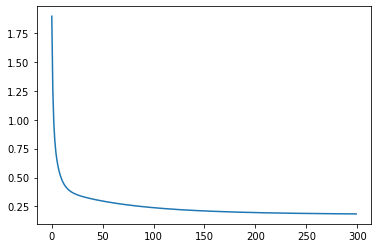

In [13]:
plt.plot(cost_list)
plt.show()

In [14]:
ss_tot=sum((y_norm-y_norm.mean())**2)
ss_res=sum((y_norm-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  [0.63002559]


# Using sklearn

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
data2=np.genfromtxt('/home/mnasser/Downloads/california_housing_train.csv',delimiter=',',skip_header=1)

In [20]:
x_features=np.array(data2[:,0:8])
y=np.array(data2[:,8]).reshape(len(data2),1)
print('Features : \n',x_features)
print('Output : \n',y)

Features : 
 [[-114.31     34.19     15.     ... 1015.      472.        1.4936]
 [-114.47     34.4      19.     ... 1129.      463.        1.82  ]
 [-114.56     33.69     17.     ...  333.      117.        1.6509]
 ...
 [-124.3      41.84     17.     ... 1244.      456.        3.0313]
 [-124.3      41.8      19.     ... 1298.      478.        1.9797]
 [-124.35     40.54     52.     ...  806.      270.        3.0147]]
Output : 
 [[ 66900.]
 [ 80100.]
 [ 85700.]
 ...
 [103600.]
 [ 85800.]
 [ 94600.]]


In [21]:
model = LinearRegression()
model.fit(x_features, y)
print('Intercept = ', model.intercept_)
print('Coeficients = ', model.coef_)

Intercept =  [-3620600.892974]
Coeficients =  [[-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
   1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]]


In [22]:
y_predict=model.predict(x_features)
print(y_predict)

[[  7128.08452522]
 [ 73675.60144233]
 [-31317.28531193]
 ...
 [100878.32872674]
 [ 63733.2214472 ]
 [186850.92450277]]


In [23]:
r2=model.score(x_features,y)
print('R_Squared = ', r2)

R_Squared =  0.6413378529502689
